17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/10
782/782 [==============================] - 12s 15ms/step - loss: 0.5755 - accuracy: 0.7004 - val_loss: 0.4800 - val_accuracy: 0.7682
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.3840 - accuracy: 0.8338 - val_loss: 0.4773 - val_accuracy: 0.7692
Epoch 3/10
782/782 [==============================] - 8s 11ms/step - loss: 0.2543 - accuracy: 0.9069 - val_loss: 0.5210 - val_accuracy: 0.7548
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1469 - accuracy: 0.9604 - val_loss: 0.5806 - val_accuracy: 0.7459
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0790 - accuracy: 0.9870 - val_loss: 0.6496 - val_accuracy: 0.7407
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0415 - accuracy: 0.9959 - val_loss: 0.7211 - val_accuracy: 0.7351
Epoch 7/10
782/782 [==============================] - 13s 17ms/step - loss:

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


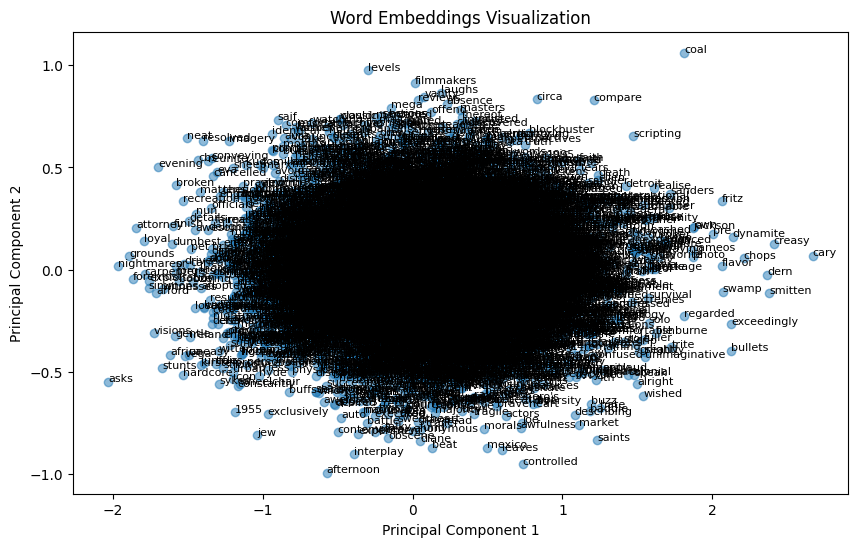

In [ ]:
# Task-1 Sentiment Analysis
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the model
embedding_dim = 50
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Extract word embeddings
word_embeddings = model.layers[0].get_weights()[0]

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_embeddings)

# Visualize word embeddings
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
words = ['<PAD>'] + [word for word, idx in imdb.get_word_index().items() if idx < max_features]
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), size=8)
plt.title('Word Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 57s 59ms/step - loss: 0.1870 - accuracy: 0.9427 - val_loss: 0.0512 - val_accuracy: 0.9836
Epoch 2/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 3/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0288 - val_accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0234 - val_accuracy: 0.9925


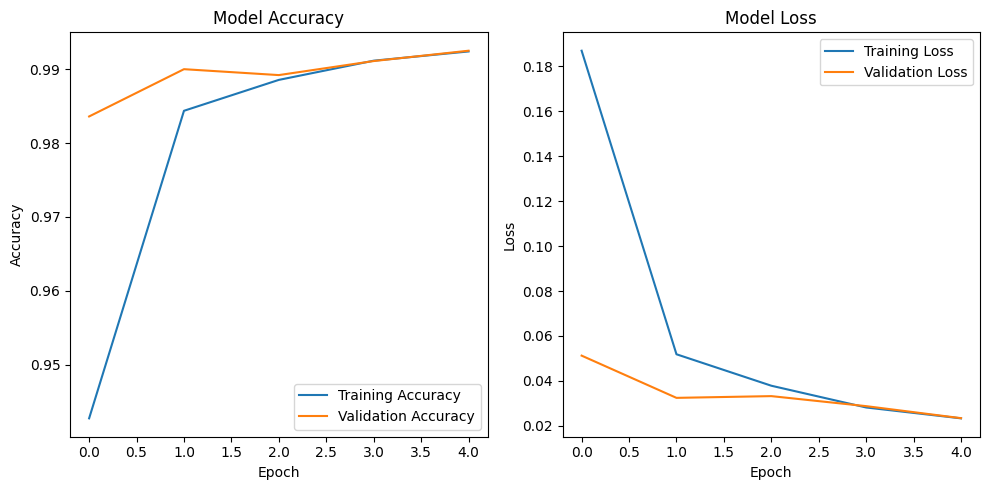

313/313 [==============================] - 3s 9ms/step - loss: 0.0234 - accuracy: 0.9925
Test loss: 0.023403577506542206
Test accuracy: 0.9925000071525574


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load the MNIST dataset
(train_images, train_labels),(test_images, test_labels) =mnist.load_data()
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28,
1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32')/ 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,
28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
batch_size=64, validation_data=(test_images, test_labels))
# Plot training history
plt.figure(figsize=(10, 5))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)